In [1]:
library("data.table")
library(pheatmap)
library(ggpubr)
library(ggfortify)
library(reshape)
library(dplyr)

Loading required package: ggplot2


Attaching package: ‘reshape’


The following object is masked from ‘package:data.table’:

    melt



Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
cosmic_genes<-fread("cosmic_hallmarks.txt",header=F)
cosmic_genes<-as.data.frame(cosmic_genes)
colnames(cosmic_genes)<-c("gene")

cosmic_matched_genes<-fread("cosmic_driver_matched.txt",header=F)
cosmic_matched_genes<-as.data.frame(cosmic_matched_genes)
colnames(cosmic_matched_genes)<-c("gene")

In [3]:
fractions_list_hppin <- list()
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","hPPIN_fractions_.*.csv")) {
fractions_list_hppin[[gsub(".csv", "",file)]] <- fread(paste("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/",
                                                                 file, sep = ""))
}

fractions_list_hppin_exp <- fractions_list_hppin[grep("upregulated|downregulated|msigdb",names(fractions_list_hppin))]


#oncogenic_status<-gsub(" ", "", combinedDF$gene_regen) %in% as.character(cosmic_genes$gene)
oncogenic_status<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_genes$gene)
fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"oncogenic_status" =as.character(oncogenic_status))


oncogenic_status_degree_matched<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_matched_genes$gene)
fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"degree_matched_oncogenic_status" =as.character(oncogenic_status_degree_matched))

current_oncogenic_status <- as.factor(fractions_initial_combinedDF$oncogenic_status)
levels(current_oncogenic_status) <- c("Non-Cancer-Driver", "COSMIC-Driver")
current_oncogenic_status <- as.character(current_oncogenic_status)
current_oncogenic_status[fractions_initial_combinedDF$degree_matched_oncogenic_status == 'TRUE'] <- 'Matched-Controls'

fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"total_oncogenic_status" =current_oncogenic_status)  

hppin_degree <- fread("hPPIN_degree_list.txt", header=F)
overlapping_degree_genes <- fractions_initial_combinedDF[fractions_initial_combinedDF$gene_list %in% hppin_degree$V1,]
nrow(overlapping_degree_genes)
degree_list <- hppin_degree[hppin_degree$V1 %in% overlapping_degree_genes$gene_list]$V2
length(degree_list)
current_oncogenic_status <- as.factor(overlapping_degree_genes$oncogenic_status)
levels(current_oncogenic_status) <- c(0, 1)

In [4]:
fractions_list_string <- list()
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","^STRING_S_fractions_.*.csv")) {
    fractions_list_string[[gsub(".csv", "",file)]] <- fread(paste("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/",
                                                                     file, sep = ""))
}

fractions_list_string_exp <- fractions_list_string[grep("upregulated|downregulated|msigdb",names(fractions_list_string))]

In [26]:
fractions_initial_combinedDF_hppin <- data.frame("gene_list" = fractions_list_hppin_exp[[1]][[1]])
for(i in 1:length(fractions_list_hppin_exp)) {
    print(names(fractions_list_hppin_exp)[i])
    temp <- cbind(fractions_initial_combinedDF_hppin[fractions_initial_combinedDF_hppin$gene_list %in% fractions_list_hppin_exp[[i]][[1]],],
                                                        fractions_list_hppin_exp[[i]][fractions_list_hppin_exp[[i]][[1]] %in% fractions_initial_combinedDF_hppin$gene_list,])
    colnames(temp)[1] <- "gene_list"
    print(nrow(temp))
    print(ncol(temp))
    fractions_initial_combinedDF_hppin <- temp
}

cols <- colnames(fractions_initial_combinedDF_hppin)[grep("(Fraction_sp_less3$|gene_list)",
                                                colnames(fractions_initial_combinedDF_hppin))]
fractions_initial_combinedDF_hppin <- fractions_initial_combinedDF_hppin[order(fractions_initial_combinedDF_hppin$gene_list),]

final_hppin_frac <- fractions_initial_combinedDF_hppin[,..cols]

[1] "hPPIN_fractions_downregulated.regen"
[1] 13989
[1] 7
[1] "hPPIN_fractions_downregulated.stress"
[1] 13989
[1] 13
[1] "hPPIN_fractions_downregulated.wound"
[1] 13989
[1] 19
[1] "hPPIN_fractions_msigdb.regen"
[1] 13989
[1] 25
[1] "hPPIN_fractions_msigdb.stress"
[1] 13989
[1] 31
[1] "hPPIN_fractions_msigdb.wound"
[1] 13989
[1] 37
[1] "hPPIN_fractions_upregulated.regen"
[1] 13989
[1] 43
[1] "hPPIN_fractions_upregulated.stress"
[1] 13989
[1] 49
[1] "hPPIN_fractions_upregulated.wound"
[1] 13989
[1] 55


In [27]:
fractions_initial_combinedDF_string <- data.frame("gene_list" = fractions_list_string_exp[[1]][[1]])
for(i in 1:length(fractions_list_string_exp)) {
    print(names(fractions_list_string_exp)[i])
    temp <- cbind(fractions_initial_combinedDF_string[fractions_initial_combinedDF_string$gene_list %in% fractions_list_string_exp[[i]][[1]],],
                                                        fractions_list_string_exp[[i]][fractions_list_string_exp[[i]][[1]] %in% fractions_initial_combinedDF_string$gene_list,])
    colnames(temp)[1] <- "gene_list"
    print(nrow(temp))
    print(ncol(temp))
    fractions_initial_combinedDF_string <- temp
}
fractions_initial_combinedDF_string_subset <- fractions_initial_combinedDF_string[fractions_initial_combinedDF_string$gene_list %in% fractions_initial_combinedDF_hppin$gene_list,]

fractions_initial_combinedDF_string <- fractions_initial_combinedDF_string_subset[order(fractions_initial_combinedDF_string_subset$gene_list),]

cols <- colnames(fractions_initial_combinedDF_string)[grep("(Fraction_sp_less2$|gene_list)",
                                                    colnames(fractions_initial_combinedDF_string))]
final_string_frac <- fractions_initial_combinedDF_string[,..cols]

[1] "STRING_S_fractions_downregulated.regen"
[1] 19344
[1] 7
[1] "STRING_S_fractions_downregulated.stress"
[1] 19344
[1] 13
[1] "STRING_S_fractions_downregulated.wound"
[1] 19344
[1] 19
[1] "STRING_S_fractions_msigdb.regen"
[1] 19344
[1] 25
[1] "STRING_S_fractions_msigdb.stress"
[1] 19344
[1] 31
[1] "STRING_S_fractions_msigdb.wound"
[1] 19344
[1] 37
[1] "STRING_S_fractions_upregulated.regen"
[1] 19344
[1] 43
[1] "STRING_S_fractions_upregulated.stress"
[1] 19344
[1] 49
[1] "STRING_S_fractions_upregulated.wound"
[1] 19344
[1] 55


In [29]:
combined_fracs<- cbind(final_hppin_frac, final_string_frac[,2:10])

In [30]:
oncogenic_status<-as.character(combined_fracs$gene_list) %in% as.character(cosmic_genes$gene)
combined_fracs<- cbind(combined_fracs,"oncogenic_status" =as.character(oncogenic_status))


oncogenic_status_degree_matched<-as.character(combined_fracs$gene_list) %in% as.character(cosmic_matched_genes$gene)
combined_fracs<- cbind(combined_fracs,"degree_matched_oncogenic_status" =as.character(oncogenic_status_degree_matched))

current_oncogenic_status <- as.factor(combined_fracs$oncogenic_status)
levels(current_oncogenic_status) <- c("Non-Cancer-Driver", "COSMIC-Driver")
current_oncogenic_status <- as.character(current_oncogenic_status)
current_oncogenic_status[combined_fracs$degree_matched_oncogenic_status == 'TRUE'] <- 'Matched-Controls'

combined_fracs<- cbind(combined_fracs,"total_oncogenic_status" =current_oncogenic_status)  

current_oncogenic_status <- as.factor(combined_fracs$oncogenic_status)
levels(current_oncogenic_status) <- c(0, 1)

In [33]:
cols <- colnames(combined_fracs)[grep("(Fraction_sp_less*|gene_list)",
                                                    colnames(combined_fracs))
                                 cols

[1] "gene_list"                             
 [2] "downregulated.regen_Fraction_sp_less3" 
 [3] "downregulated.stress_Fraction_sp_less3"
 [4] "downregulated.wound_Fraction_sp_less3" 
 [5] "msigdb.regen_Fraction_sp_less3"        
 [6] "msigdb.stress_Fraction_sp_less3"       
 [7] "msigdb.wound_Fraction_sp_less3"        
 [8] "upregulated.regen_Fraction_sp_less3"   
 [9] "upregulated.stress_Fraction_sp_less3"  
[10] "upregulated.wound_Fraction_sp_less3"   
[11] "downregulated.regen_Fraction_sp_less2" 
[12] "downregulated.stress_Fraction_sp_less2"
[13] "downregulated.wound_Fraction_sp_less2" 
[14] "msigdb.regen_Fraction_sp_less2"        
[15] "msigdb.stress_Fraction_sp_less2"       
[16] "msigdb.wound_Fraction_sp_less2"        
[17] "upregulated.regen_Fraction_sp_less2"   
[18] "upregulated.stress_Fraction_sp_less2"  
[19] "upregulated.wound_Fraction_sp_less2"

In [34]:
total_fractions<- combined_fracs[,..cols]
total_fraction_input_total <- cbind(total_fractions, "label" = current_oncogenic_status)
total_fraction_input_total <- total_fraction_input_total %>% relocate(gene_list, .after = last_col())

total_cd<- total_fraction_input_total[total_fraction_input_total$label == 1,]
total_ncd<- total_fraction_input_total[total_fraction_input_total$label == 0,]

sampled_total_cd <- data.frame(total_cd[sample(nrow(total_cd)),])
sampled_total_ncd <- data.frame(total_ncd[sample(nrow(total_ncd)),])

In [35]:
ppi_name <- "hPPIN_STRING_exp"
write.table(total_fraction_input_total,
            paste("./machine_learning/",ppi_name, "_total_fraction_total.csv",sep=""),
            sep=",", quote=F, row.names = F, col.names=TRUE)
write.table(rbind(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),1:length(total_fraction_input_total)-1], sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),1:length(total_fraction_input_total) -1]),
            paste("./machine_learning/",ppi_name, "_total_fraction_train.csv",sep=""),
            sep=",", quote=F, row.names = F, col.names=TRUE)
write.table(rbind(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),1:length(total_fraction_input_total)-1], sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),1:length(total_fraction_input_total)-1]),
            paste("./machine_learning/",ppi_name, "_total_fraction_test.csv",sep=""),
            sep=",", quote=F, row.names = F, col.names=TRUE)


write.table(c(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),]$gene_list, sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),]$gene_list),
            paste("./machine_learning/",ppi_name, "_total_fraction_train_gene_list.csv",sep=""),
            sep=",", quote=F, row.names = F, col.names=TRUE)
write.table(c(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),]$gene_list, sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),]$gene_list),
            paste("./machine_learning/",ppi_name, "_total_fraction_test_gene_list.csv",sep=""),
            sep=",", quote=F, row.names = F, col.names=TRUE)

# tests

In [38]:
fractions_combinedDF_EXP <- combined_fracs

cols <- colnames(fractions_combinedDF_EXP)[grep("Fraction_sp_less*",colnames(fractions_combinedDF_EXP))]
colnames(fractions_combinedDF_EXP[,..cols])

[1] "downregulated.regen_Fraction_sp_less3" 
 [2] "downregulated.stress_Fraction_sp_less3"
 [3] "downregulated.wound_Fraction_sp_less3" 
 [4] "msigdb.regen_Fraction_sp_less3"        
 [5] "msigdb.stress_Fraction_sp_less3"       
 [6] "msigdb.wound_Fraction_sp_less3"        
 [7] "upregulated.regen_Fraction_sp_less3"   
 [8] "upregulated.stress_Fraction_sp_less3"  
 [9] "upregulated.wound_Fraction_sp_less3"   
[10] "downregulated.regen_Fraction_sp_less2" 
[11] "downregulated.stress_Fraction_sp_less2"
[12] "downregulated.wound_Fraction_sp_less2" 
[13] "msigdb.regen_Fraction_sp_less2"        
[14] "msigdb.stress_Fraction_sp_less2"       
[15] "msigdb.wound_Fraction_sp_less2"        
[16] "upregulated.regen_Fraction_sp_less2"   
[17] "upregulated.stress_Fraction_sp_less2"  
[18] "upregulated.wound_Fraction_sp_less2"

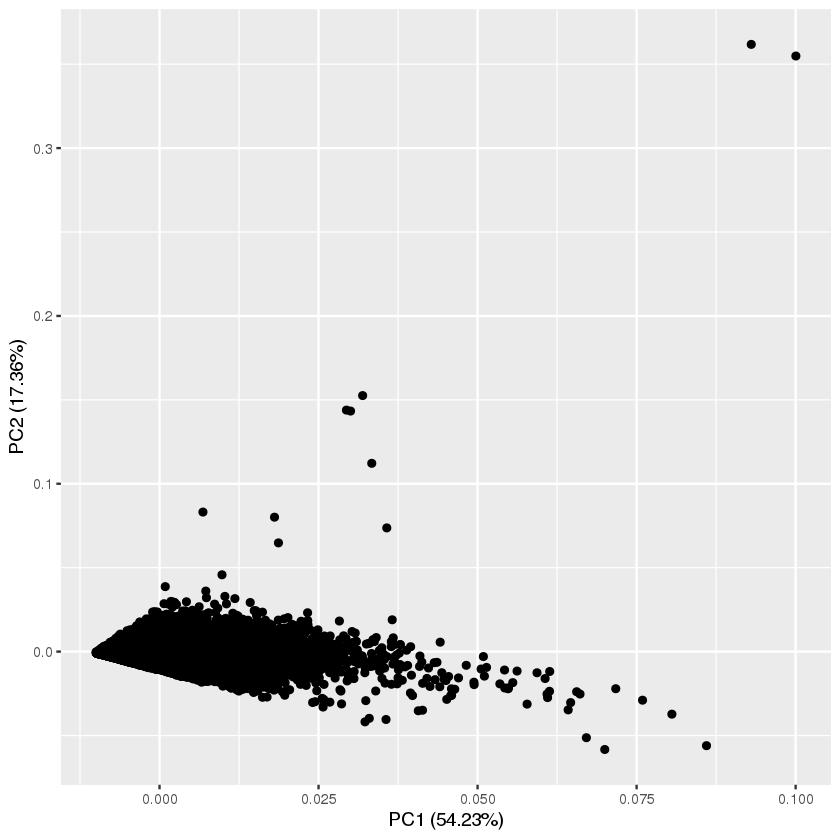

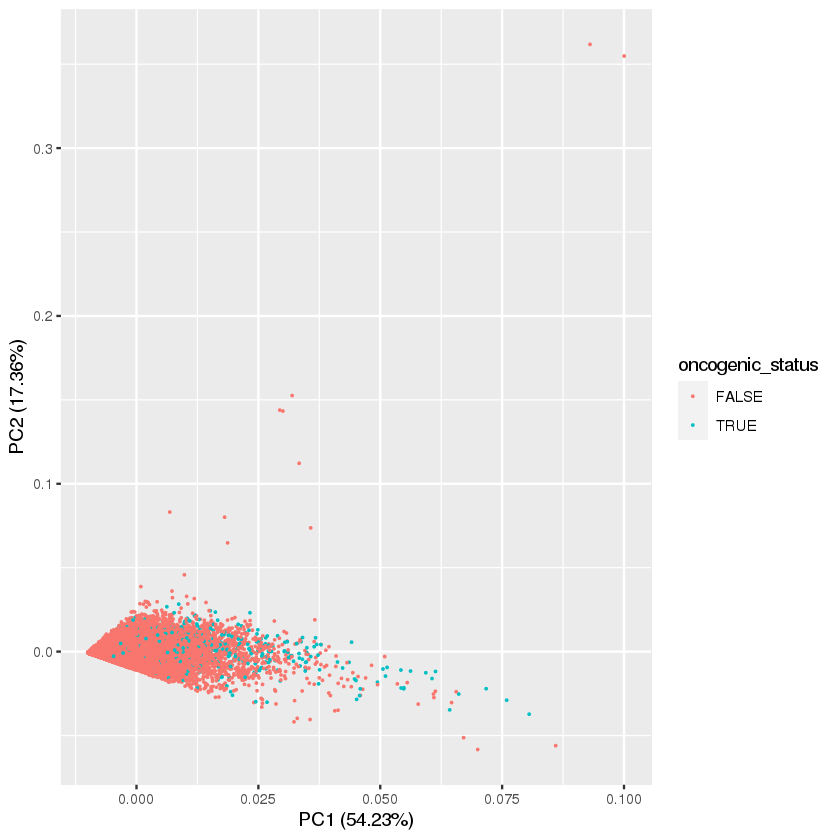

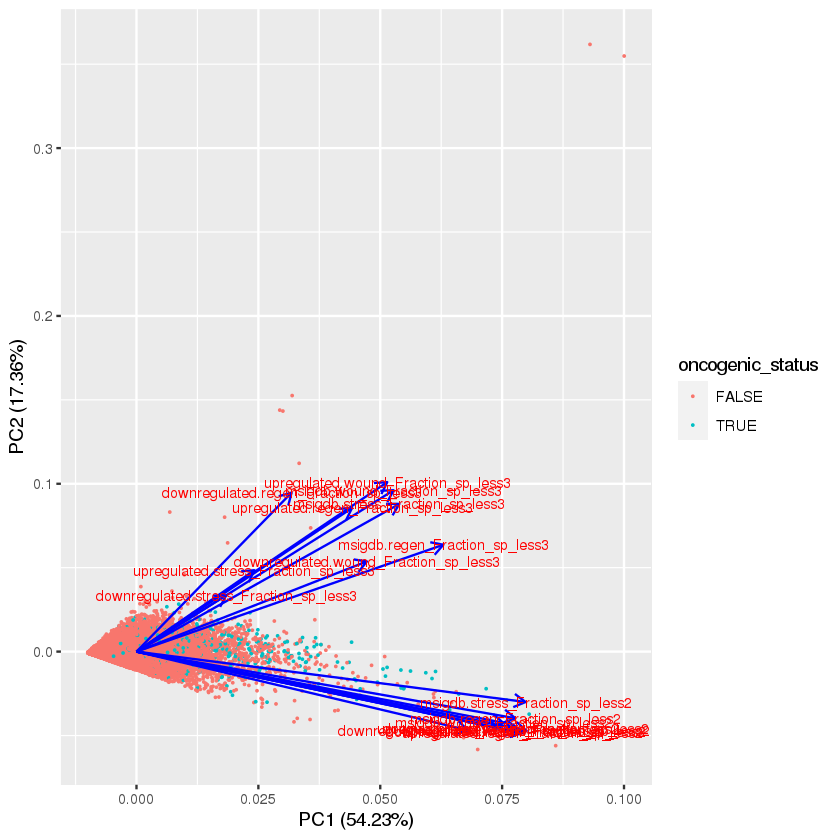

In [46]:
scale_exp <- fractions_combinedDF_EXP[,..cols]
pca_res_exp <- prcomp(scale_exp, scale. = TRUE)
autoplot(pca_res_exp)
autoplot(pca_res_exp, data = fractions_combinedDF_EXP,
         colour = 'oncogenic_status',
         size = .01)

autoplot(pca_res_exp, data = fractions_combinedDF_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,
         size = .01)

# make the dots a little smaller

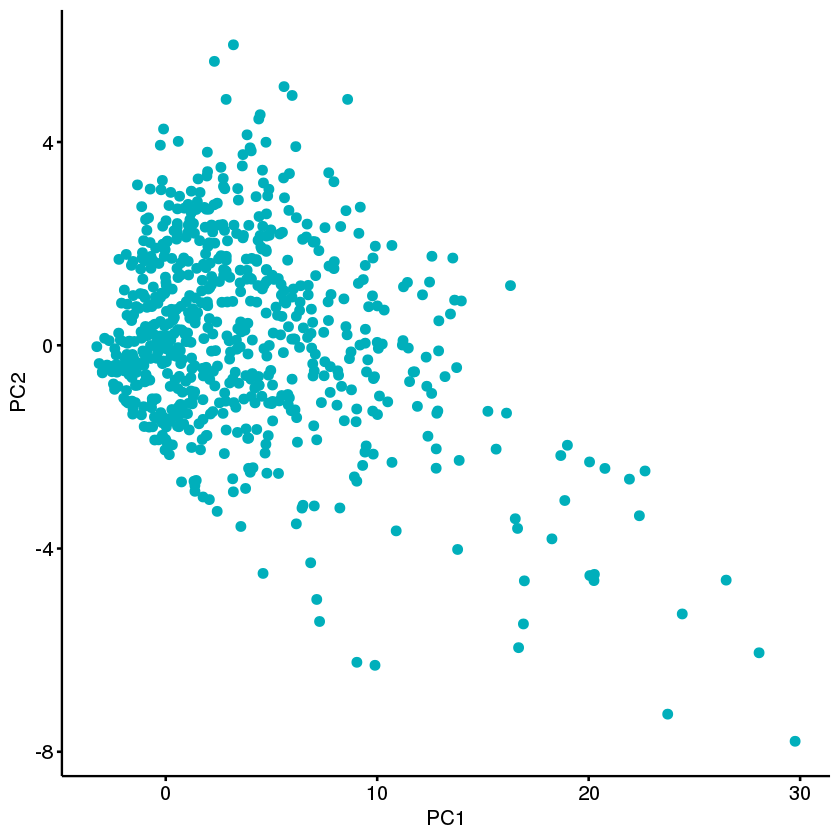

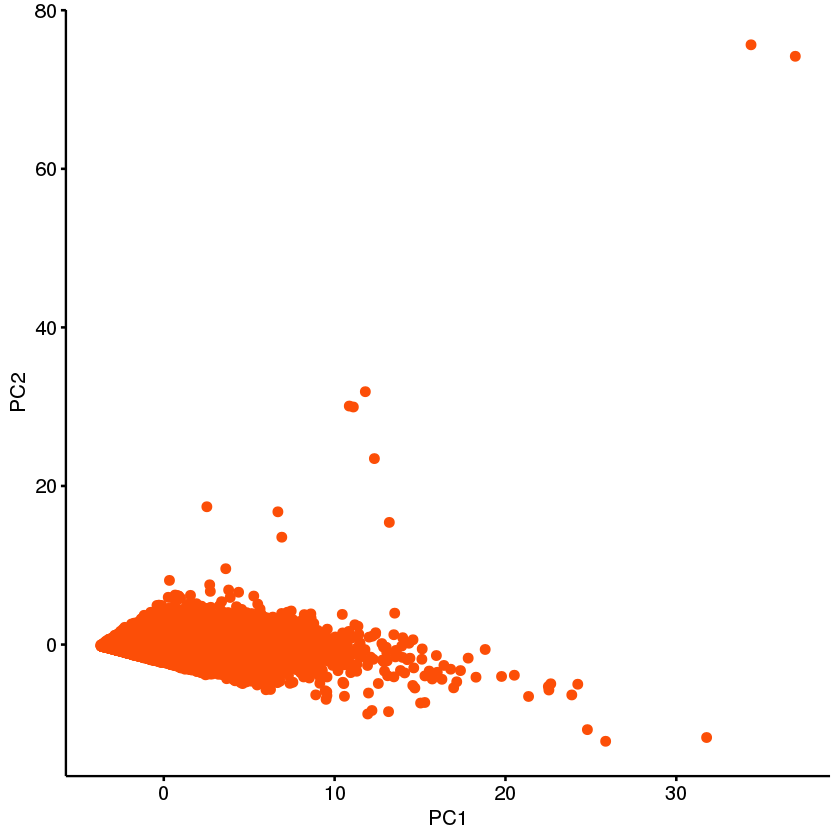

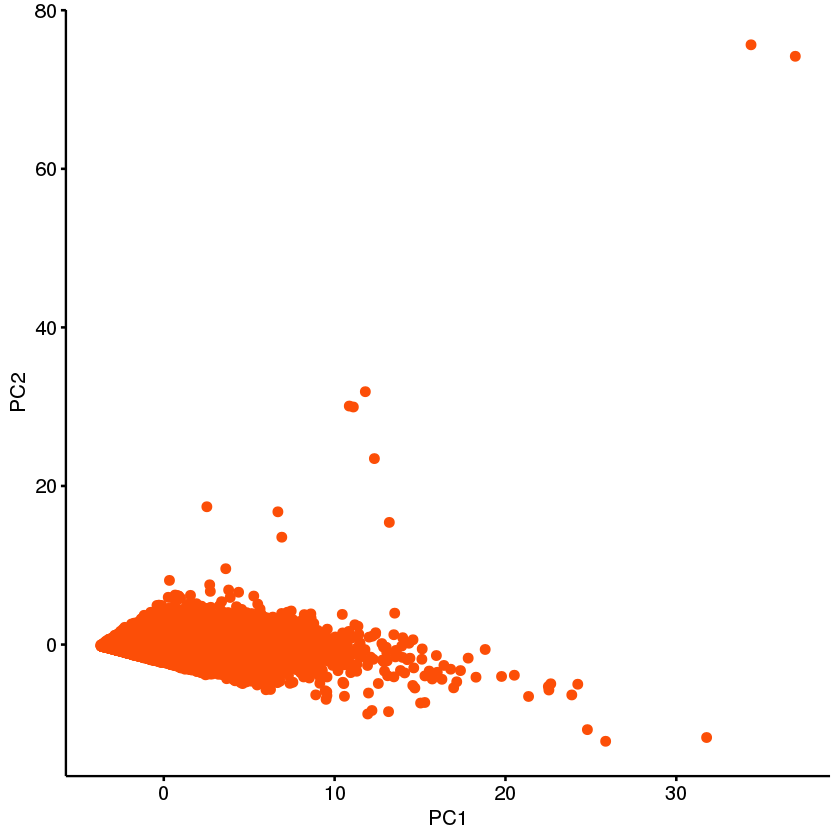

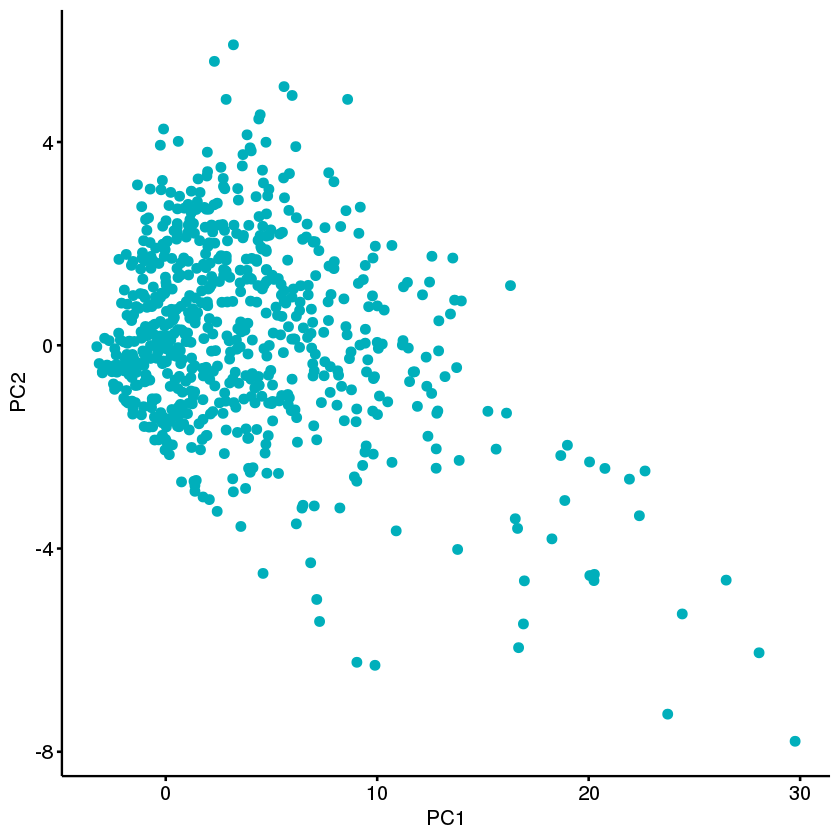

In [48]:
onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

Using  as id variables



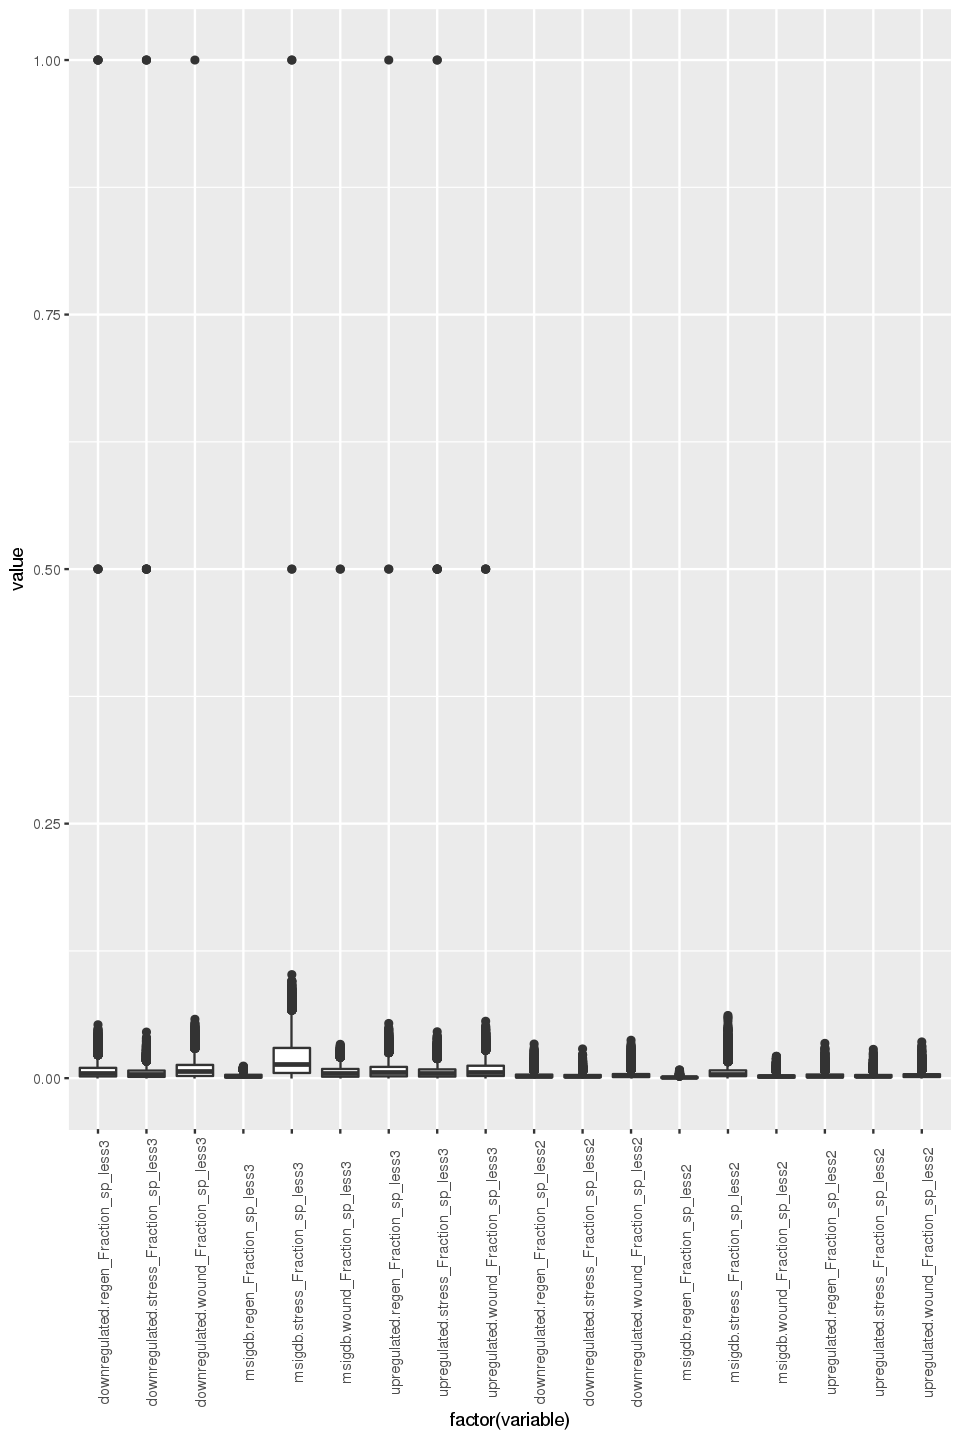

In [49]:
# fractions distributed
options(repr.plot.width=8, repr.plot.height=12)
meltData <- melt(data.frame(scale_exp))
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables

Using  as id variables



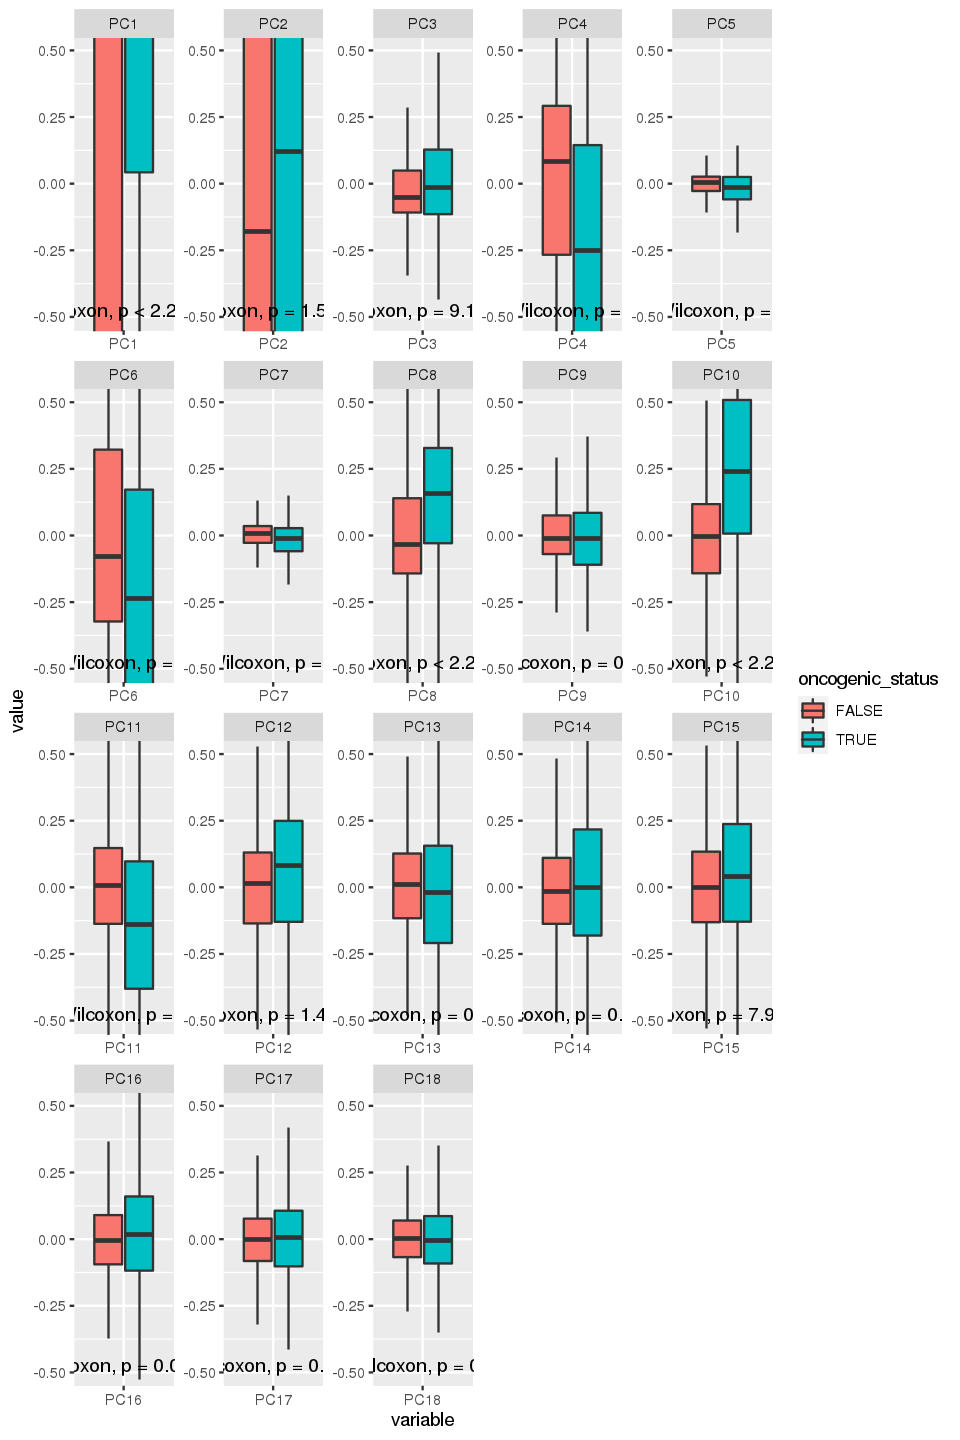

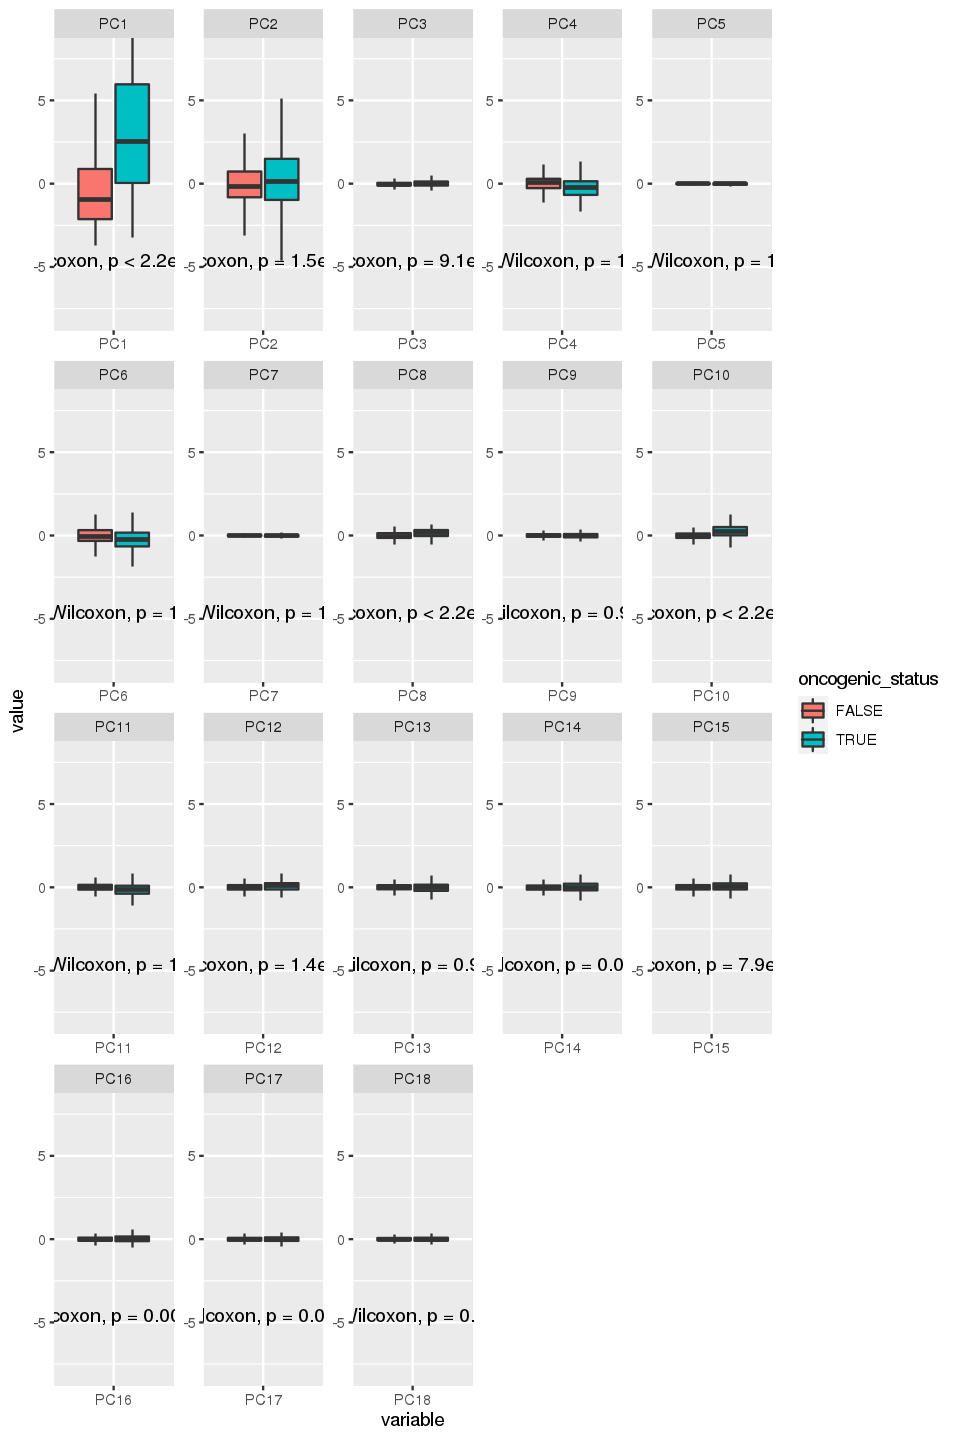

In [50]:
# pca distribution (zoomed in for smaller values)
options(repr.plot.width=8, repr.plot.height=12)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-.5, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -.5)

# pca distribution (zoomed out for PC1)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-8, 8)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -5)

Using  as id variables



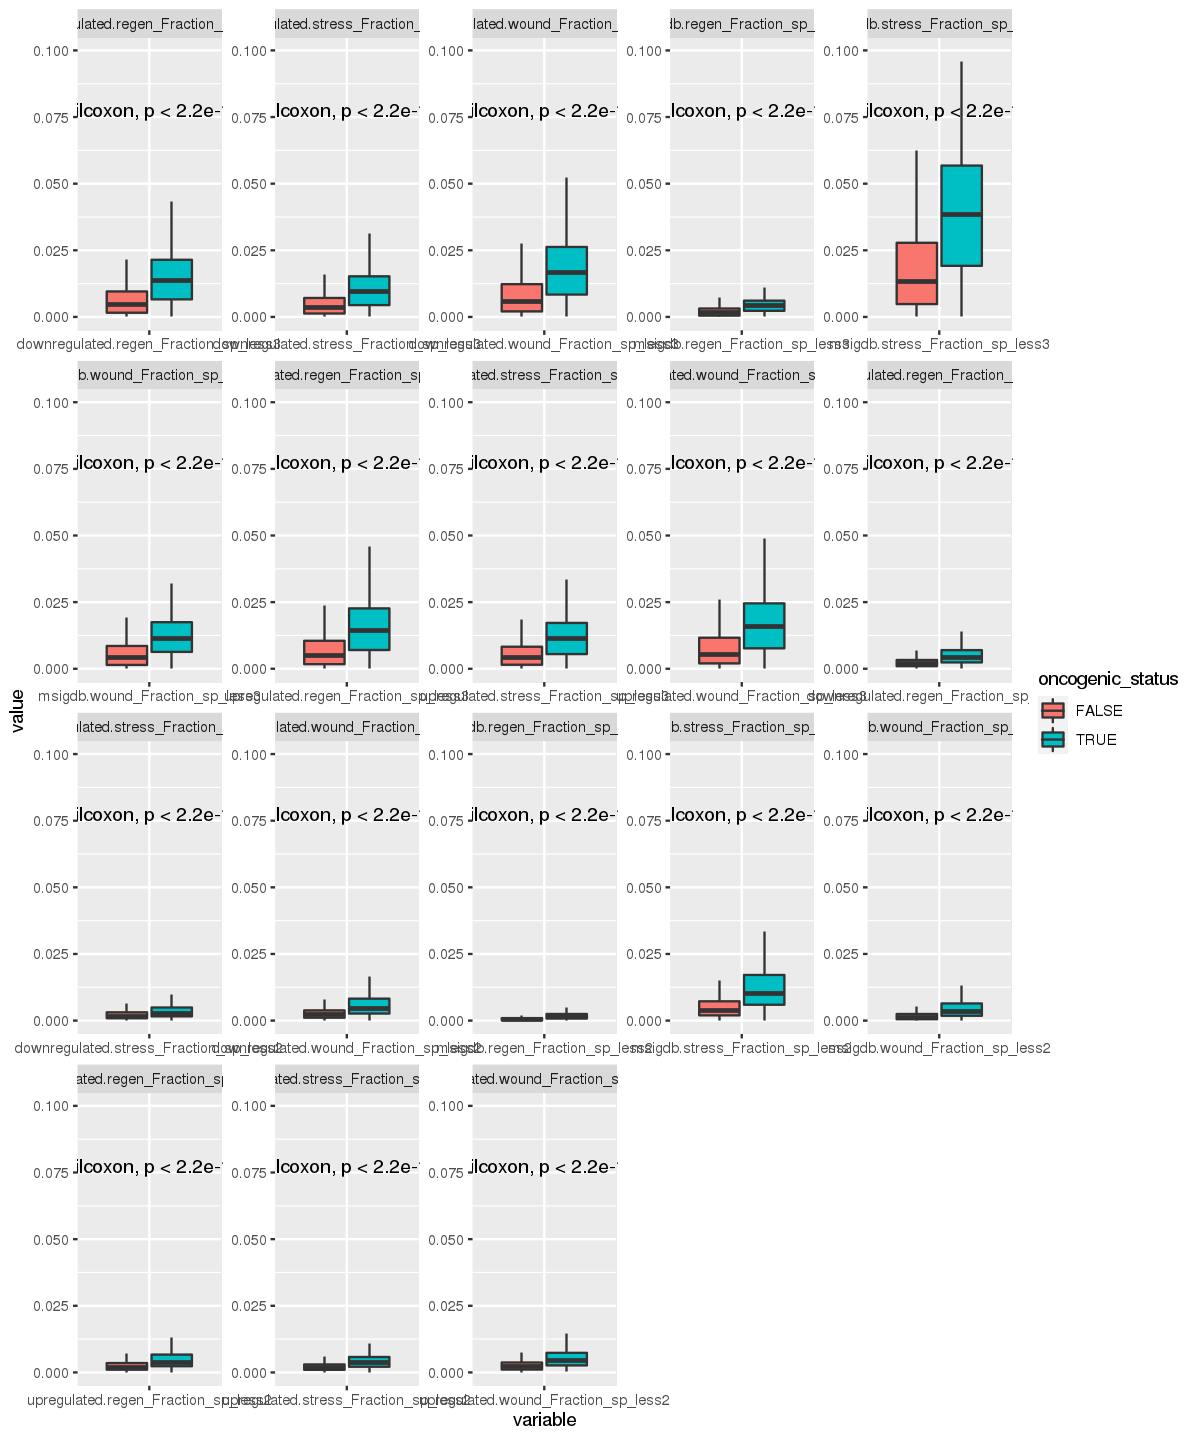

In [52]:
# fractions  distribution  oncogenic vs non (zooed in)
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(scale_exp)))

ggplot(pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .1)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 0.075)

Using  as id variables



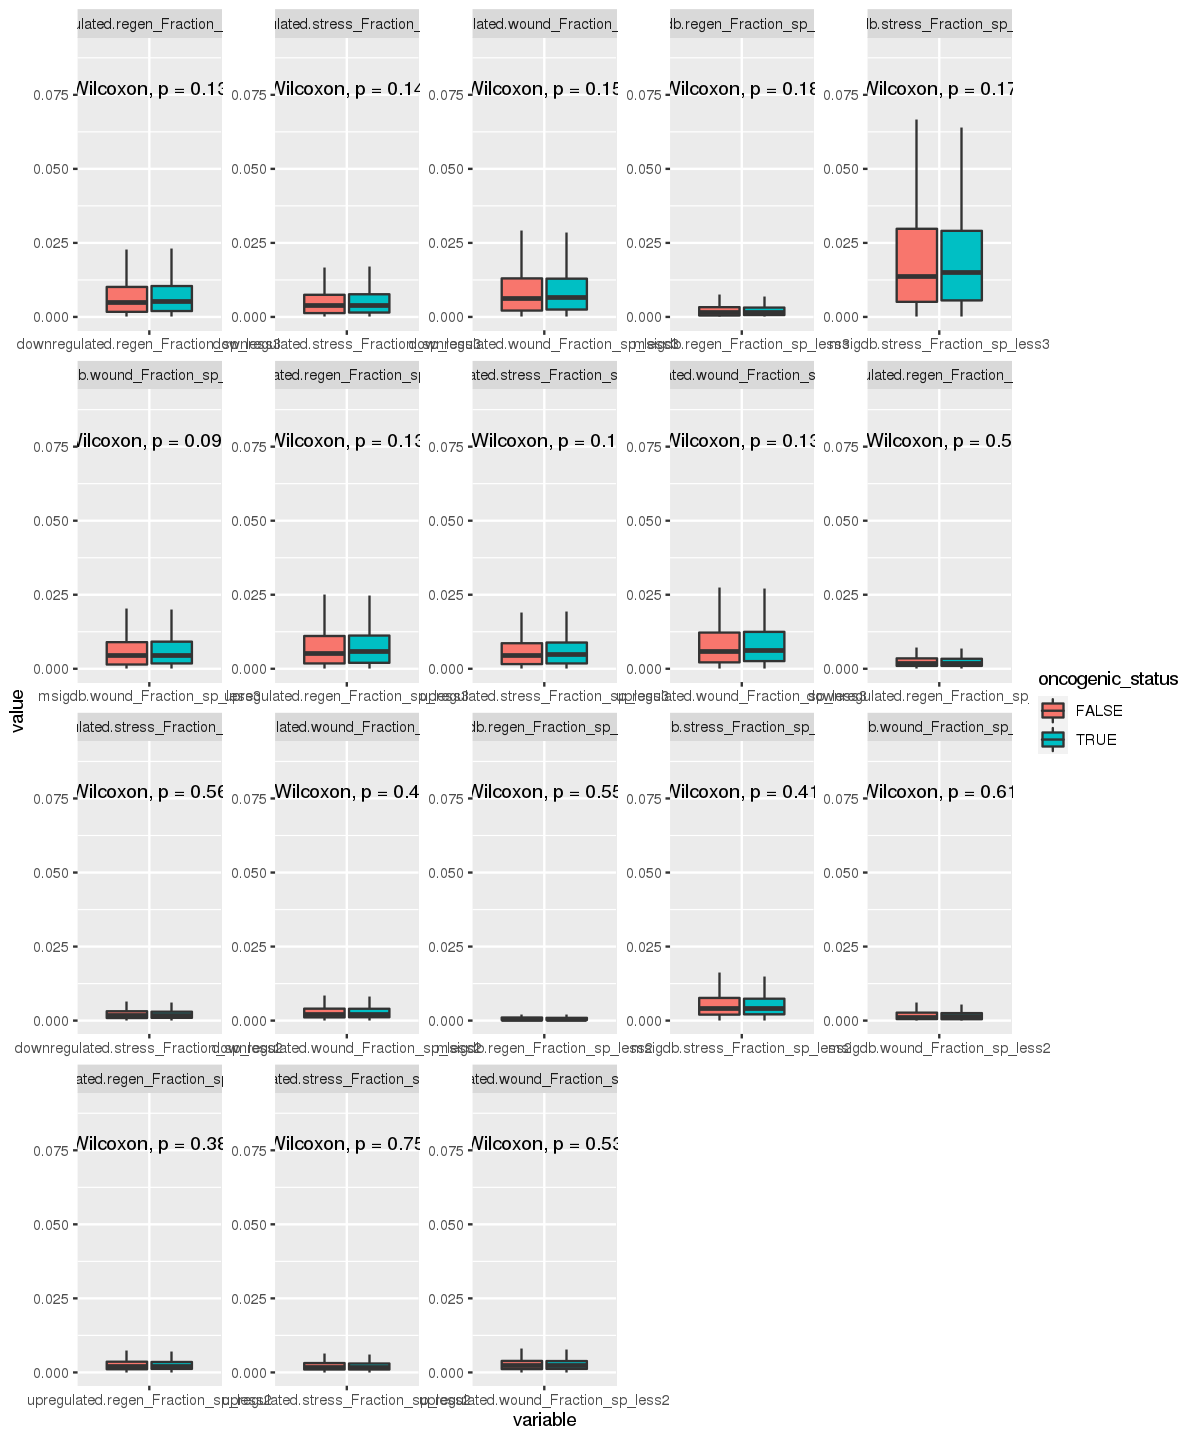

In [54]:
# random test
options(repr.plot.width=10, repr.plot.height=12)
random_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(sample(fractions_combinedDF_EXP$oncogenic_status), ncol(scale_exp)))

ggplot(random_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .09)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 0.075)

Using  as id variables



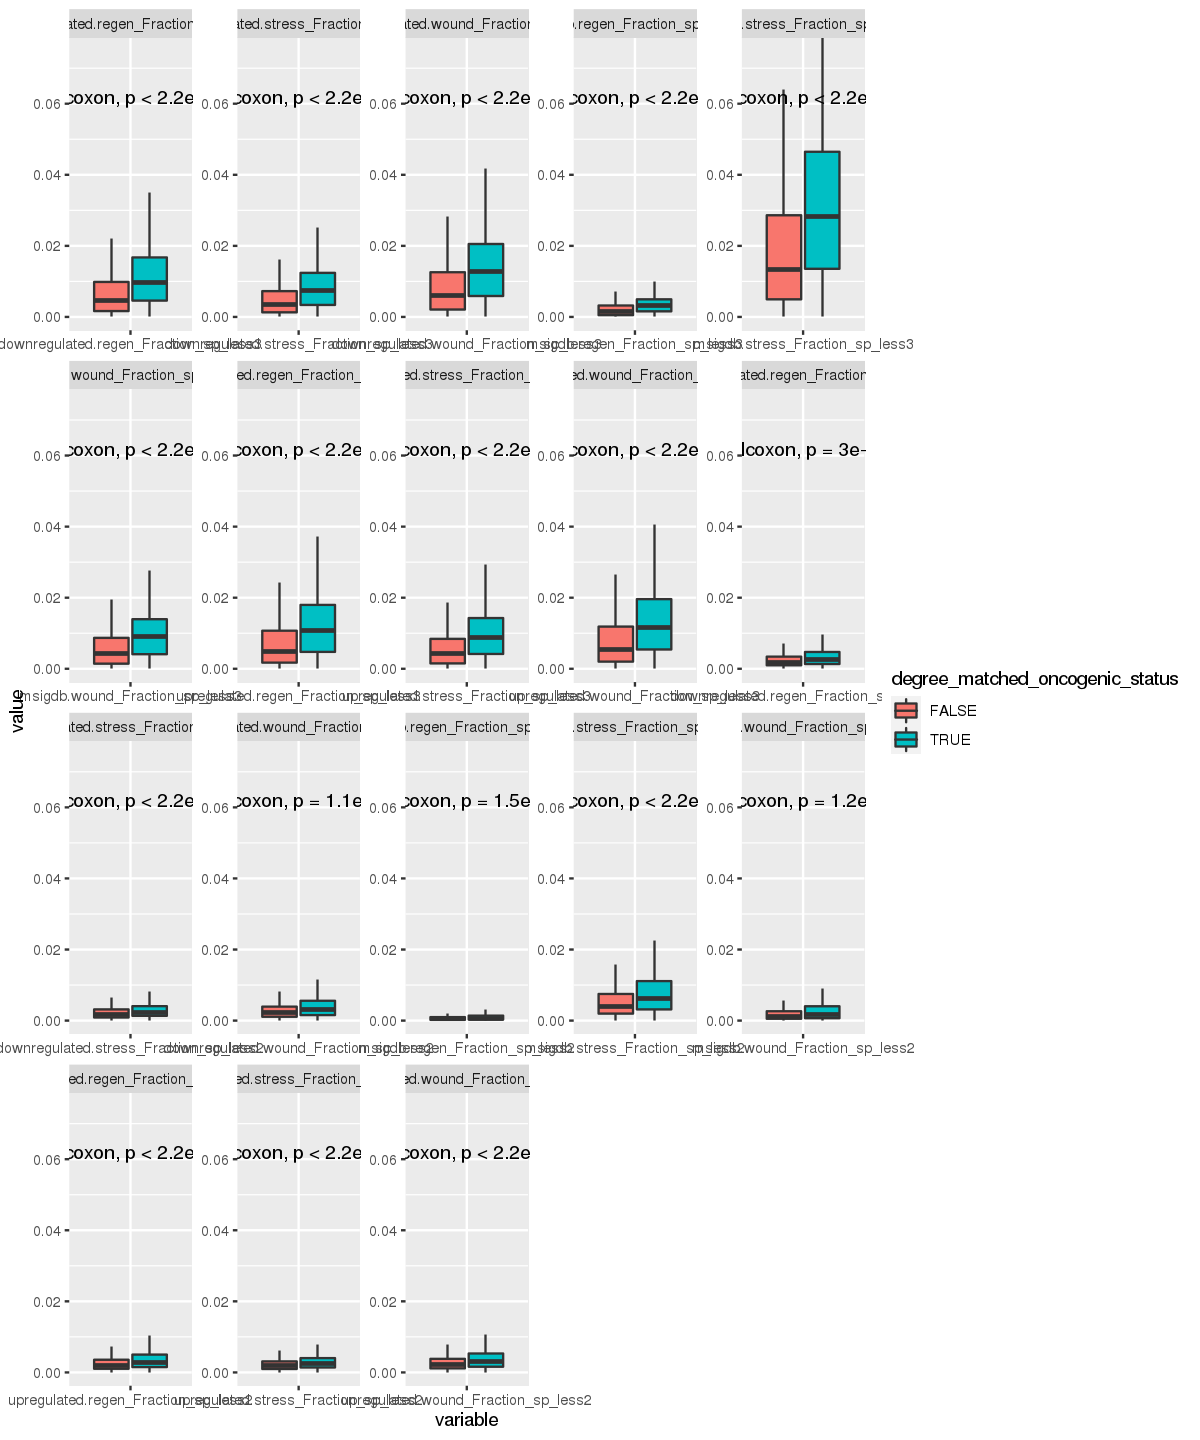

In [55]:
# degree matched
options(repr.plot.width=10, repr.plot.height=12)
degree_matched_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_EXP$degree_matched_oncogenic_status, ncol(scale_exp)))

ggplot(degree_matched_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .075)) +
stat_compare_means(aes(group = degree_matched_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = 0.06)

Using  as id variables



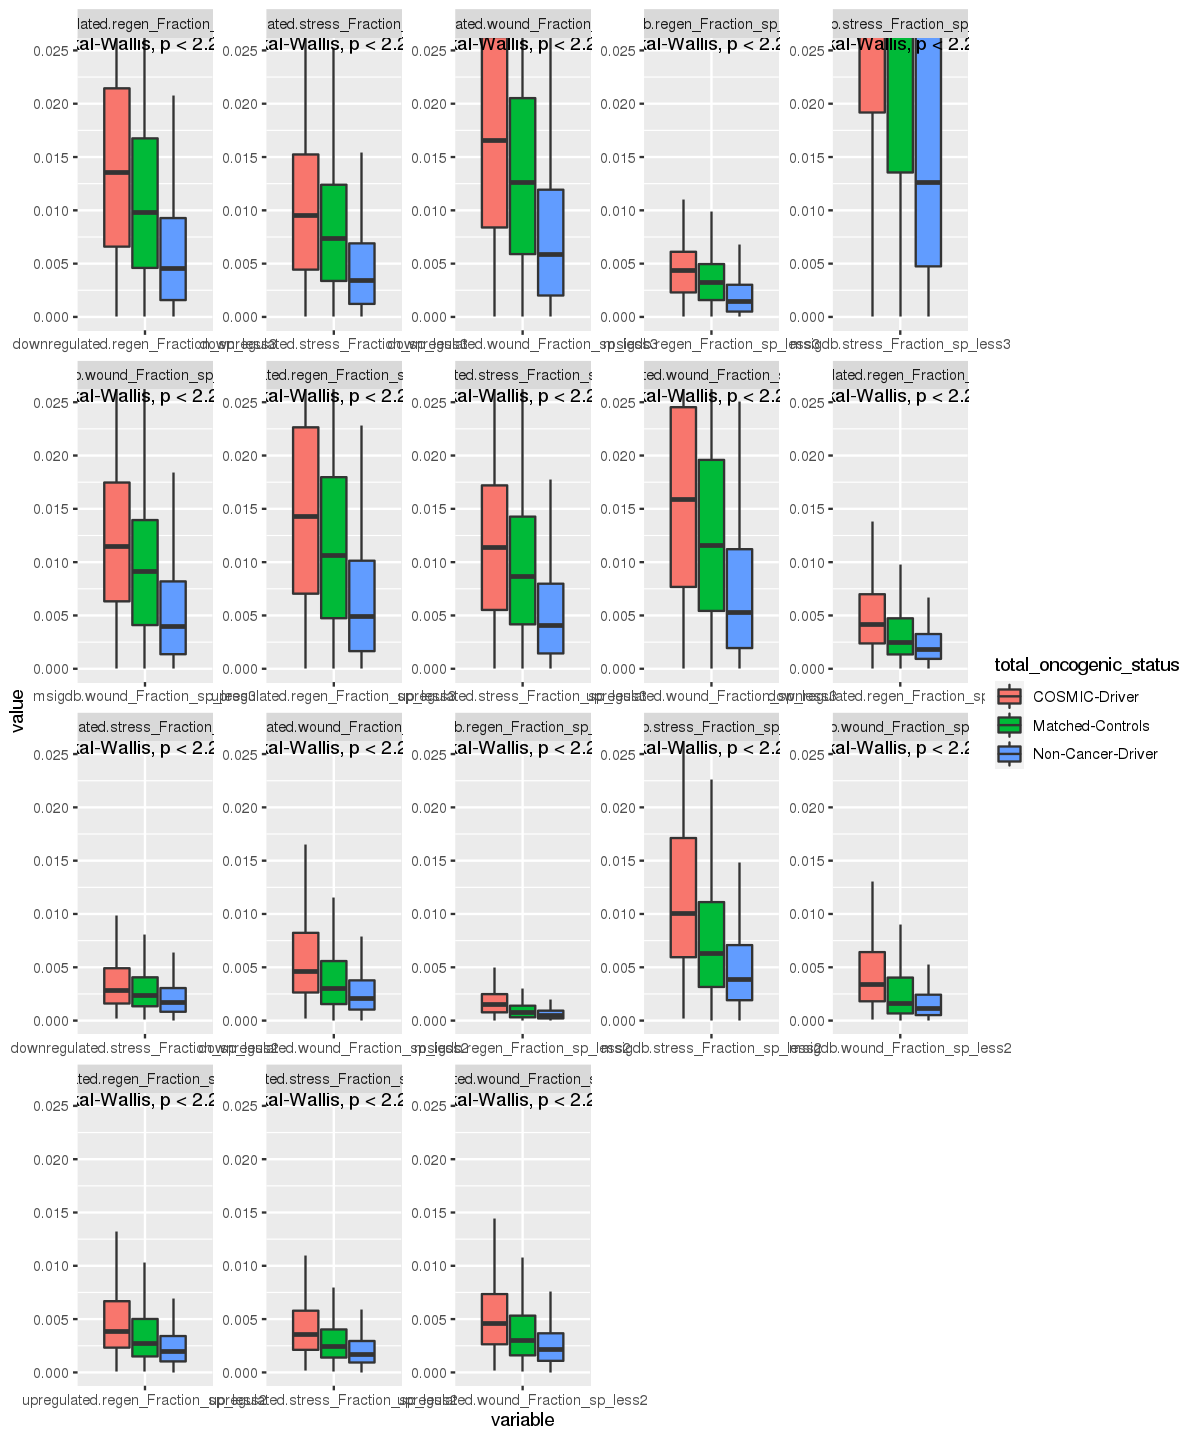

In [56]:
# 3 measures
options(repr.plot.width=10, repr.plot.height=12)
triple_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "total_oncogenic_status" = rep(fractions_combinedDF_EXP$total_oncogenic_status, ncol(scale_exp)))

ggplot(triple_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .025)) +
stat_compare_means(aes(group = total_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = .025)

In [57]:
library(caTools)
labels <- as.factor(triple_pca_melted_exp4_raw$total_oncogenic_status)
print(table(triple_pca_melted_exp4_raw$total_oncogenic_status))
levels(labels) <- c(1,0,0)
print(table(labels))
total_auroc <- data.frame("fractions" = triple_pca_melted_exp4_raw$value, labels)
colAUC(total_auroc$fractions, total_auroc$labels, plotROC=FALSE, alg=c("Wilcoxon","ROC"))


    COSMIC-Driver  Matched-Controls Non-Cancer-Driver 
            12168             10566            229068 
labels
     1      0 
 12168 239634 


1 vs. 0,0.7005248
